In [4]:
import pandas as pd
pd.options.display.max_columns = 200

path = r"C:\Users\khair\Desktop\ML and DL Workplace\Machine-Learning-Projects\house Price LR\Housing.csv"
# change path if needed
df = pd.read_csv(path)
# basic checks
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
display(df.head(10))
print("\nInfo:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(30))
print("\nNumeric summary:\n", df.describe().T)


Shape: (545, 13)

Columns:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing values per column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mai

Step 2 — Split columns into features and target 

Our target (y) is price — what we want to predict.
Our features (X) are everything else.

But we need to convert the categorical columns (object type) into numeric, because linear regression can’t handle words like “yes/no” or “furnished/unfurnished.”

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 1. Define features and target
X = df.drop('price', axis=1)
y = df['price']

# 2. Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)


Categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numeric: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [9]:

# 3. Preprocess: OneHotEncode the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (436, 12) Test shape: (109, 12)


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Create the full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = model.predict(X_test)

# 4. Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")


R² Score: 0.6529
MAE: 970,043
RMSE: 1,324,507


In [11]:
import pandas as pd

# Get feature names from one-hot encoder
encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_features) + numeric_cols

# Combine feature names with coefficients
coefficients = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})
coef_df['abs_coef'] = coef_df['Coefficient'].abs()

# Sort by importance
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)
print(coef_df[['Feature', 'Coefficient']].head(15))


                            Feature   Coefficient
10                        bathrooms  1.094445e+06
4               airconditioning_yes  7.914267e+05
3               hotwaterheating_yes  6.846499e+05
5                      prefarea_yes  6.298906e+05
7      furnishingstatus_unfurnished -4.136451e+05
11                          stories  4.074766e+05
2                      basement_yes  3.902512e+05
0                      mainroad_yes  3.679199e+05
1                     guestroom_yes  2.316100e+05
12                          parking  2.248419e+05
6   furnishingstatus_semi-furnished -1.268818e+05
9                          bedrooms  7.677870e+04
8                              area  2.359688e+02


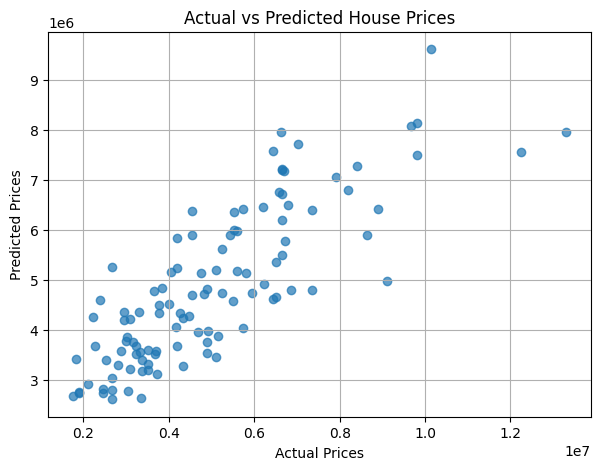

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [5]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Create PDF
pdf_path = r"C:\Users\khair\Desktop\ML and DL Workplace\Machine-Learning-Projects\Python_Roadmap.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Title
story.append(Paragraph("🐍 Ultimate Python Roadmap", styles['Title']))
story.append(Spacer(1, 12))

content = """
### 🐣 LEVEL 1: Core Syntax (The Baby Python)
• Variables & Data types (int, float, str, bool)
• Lists, Tuples, Sets, Dictionaries
• Loops (for, while)
• Conditionals (if, elif, else)
• Functions & return values
• Input/Output
• String formatting (f"", .format())

### 🧩 LEVEL 2: Intermediate (Actually Building Stuff)
• List comprehensions [x for x in range(5)]
• Lambda functions
• *args & **kwargs
• File handling (open, read, write)
• Error handling (try...except...finally)
• Modules & Imports
• Virtual environments

### 🧠 LEVEL 3: OOP (Object-Oriented Programming)
• Classes & Objects
• __init__ method
• Inheritance, Polymorphism, Encapsulation
• Class methods, Static methods, Properties
• Magic/Dunder methods (__str__, __add__, etc.)
• Composition (using objects inside other objects)

### 🪄 LEVEL 4: Advanced Python Magic
• Decorators (@decorator)
• Generators (yield)
• Iterators
• Context Managers (with statements)
• Closures
• Metaclasses
• Descriptors

### 🧰 LEVEL 5: Libraries & Tools
• NumPy, Pandas, Matplotlib
• requests, os, sys, json, time, re
• argparse, logging
• Environment variables (dotenv)
• Packaging (__init__.py, setup.py)

### 🤖 LEVEL 6: Modern Python Skills
• Async programming (async, await)
• Type hints (def add(x: int) -> int:)
• Dataclasses (@dataclass)
• Pydantic (for data validation)
• FastAPI / Flask (for APIs)
• Pytest (for testing)

### 🧬 LEVEL 7: Machine Learning Ready
• NumPy matrix ops
• Pandas dataframes
• Sklearn pipelines
• PyTorch / TensorFlow basics

### ⚙️ LEVEL 8: Deployment & MLOps
• Docker
• Git / GitHub
• CI/CD
• Model serving (FastAPI, Hugging Face Spaces)
• Streamlit / Gradio dashboards

Master Levels 1–4 → 80% Python Devs beat
Finish 5–8 → You're basically an AI Engineer 🚀
"""

for line in content.split("\n"):
    story.append(Paragraph(line, styles["Normal"]))
    story.append(Spacer(1, 6))

doc.build(story)
pdf_path


'C:\\Users\\khair\\Desktop\\ML and DL Workplace\\Machine-Learning-Projects\\Python_Roadmap.pdf'